# TP - HMMA238

Par Mathias Gout et Julie Røste.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercice 1 - Le jeu de la vie

### Question 4:

In [45]:
from utils import calcul_nb_voisins
from utils import iteration_jeu
Z_init = [[0,0,0,0,0,0], 
          [0,0,0,1,0,0], 
          [0,1,0,1,0,0], 
          [0,0,1,1,0,0],
          [0,0,0,0,0,0], 
          [0,0,0,0,0,0]]
     

calcul_nb_voisins(Z_init)

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

`calcul_nb_voisins(Z)` affiche le nombre de voisins vivants de chaque cellules

### Question 5:

In [63]:
Z_init

[[0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 0],
 [0, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 0, 0]]

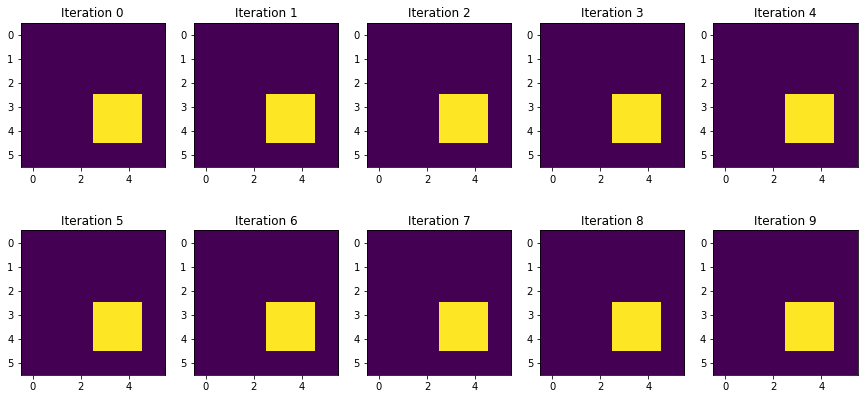

In [78]:
def plotJeuDeLaVie(nbIterations,Z,iter_func):
    """
    Plotting the evolution of the matrices of Jeu de La Vie.
    """
    Zcopy = Z.copy()
    plt.figure(figsize=(15,7))
    plt.subplot(2,5,1)
    plt.title("Iteration 0")
    plt.imshow(Zcopy)
    for i in range(2,nbIterations+1):
        plt.subplot(2,5,i)
        Zcopy = iter_func(Zcopy)
        plt.title("Iteration "+str(i-1))
        plt.imshow(Zcopy)

plotJeuDeLaVie(10,np.asarray(Z_init),iteration_jeu)

### Question 6:

On remarque que les cellules vivantes de l'itération 0 sont disposées de la même façon que celles de l'itération 4. 
<br/>Entre l'itération 0 et 4, les cellules vivantes se sont toutes déplacées d'une cellule en bas et d'une cellule à droite.

A partir de l'itération 7, les cellules ne changent plus d'état. 
Les quatres cellules vivantes sont regroupées en bas à droite et ont toutes 3 voisins vivants (aucun décès possible).
<br/>Comme aucune cellule morte n'a 3 voisins vivants (pas de naissance possible), il n'y aura pas d'évolution dans les prochaines itérations.


### Question 7 - Implémentation avec `numba`

In [54]:
from numba import jit

Comments: Have to rewrite functions to numpy, it not it didn't work..... So they are rewritten in utils to `calcul_np_voisins_np` and `iteration_jeu_np`. 

In [66]:
Z_init = [[0,0,0,0,0,0], # remark: Using python list
          [0,0,0,1,0,0], 
          [0,1,0,1,0,0], 
          [0,0,1,1,0,0],
          [0,0,0,0,0,0], 
          [0,0,0,0,0,0]]
Z_np = np.array(Z_init)

In [80]:
import time
from utils import calcul_nb_voisins_np
# DO NOT REPORT THIS... COMPILATION TIME IS INCLUDED IN THE EXECUTION TIME!
start = time.time()
print(calcul_nb_voisins_np(Z_np))
end = time.time()
print("Elapsed (including compilation) = %s" % (end - start))

# NOW THE FUNCTION IS COMPILED, RE-TIME IT EXECUTING FROM CACHE.
start = time.time()
print(calcul_nb_voisins_np(Z_np))
end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))

# NOT USING NUMBA.JIT() TO COMPARE RUNNING TIMES. 
start = time.time()
print(calcul_nb_voisins(Z_init))
end = time.time()
print("Elapsed (not using numba.jit()) = %s" % (end-start))

[[0. 0. 0. 0. 0. 0.]
 [0. 1. 3. 1. 2. 0.]
 [0. 1. 5. 3. 3. 0.]
 [0. 2. 3. 2. 2. 0.]
 [0. 1. 2. 2. 1. 0.]
 [0. 0. 0. 0. 0. 0.]]
Elapsed (including compilation) = 0.0
[[0. 0. 0. 0. 0. 0.]
 [0. 1. 3. 1. 2. 0.]
 [0. 1. 5. 3. 3. 0.]
 [0. 2. 3. 2. 2. 0.]
 [0. 1. 2. 2. 1. 0.]
 [0. 0. 0. 0. 0. 0.]]
Elapsed (after compilation) = 0.0
[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 1, 2, 2, 0], [0, 0, 2, 3, 3, 0], [0, 0, 2, 3, 3, 0], [0, 0, 0, 0, 0, 0]]
Elapsed (not using numba.jit()) = 0.0


On a la même matrice qu'en question 4, mais c'est assez efficace de ne pas utiliser `numba`. Pour comparer le temps utilisé pour question 5, on fait encore une fois le protocole.

Elapsed (including compilation) = 0.2915022373199463


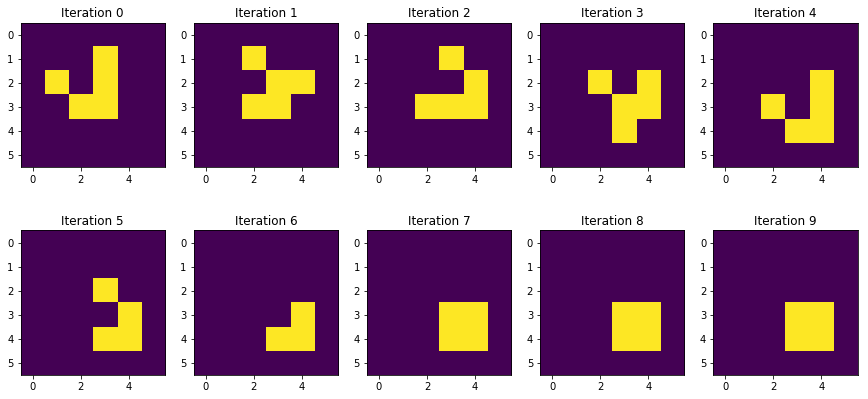

In [81]:
from utils import iteration_jeu_np
# DO NOT REPORT THIS... COMPILATION TIME IS INCLUDED IN THE EXECUTION TIME!
start = time.time()
plotJeuDeLaVie(10,Z_np,iteration_jeu_np)
end = time.time()
print("Elapsed (including compilation) = %s" % (end - start))

Elapsed (after compilation) = 0.29112720489501953


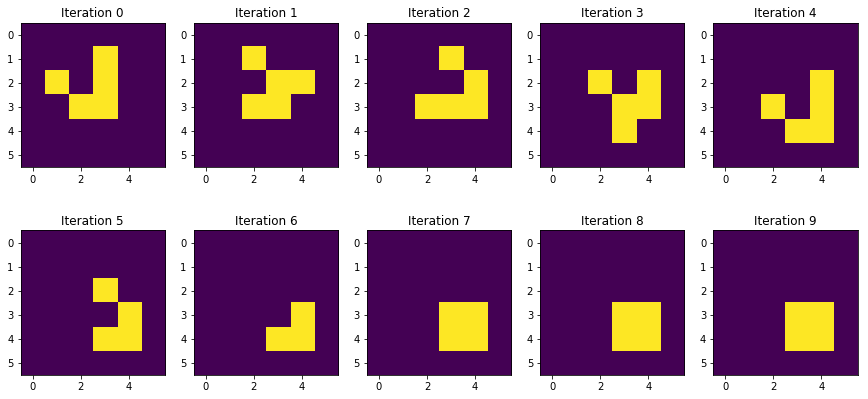

In [82]:
# NOW THE FUNCTION IS COMPILED, RE-TIME IT EXECUTING FROM CACHE.
start = time.time()
plotJeuDeLaVie(10,Z_np,iteration_jeu_np)
end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))

Elapsed (not using numba.jit()) = 0.288266658782959


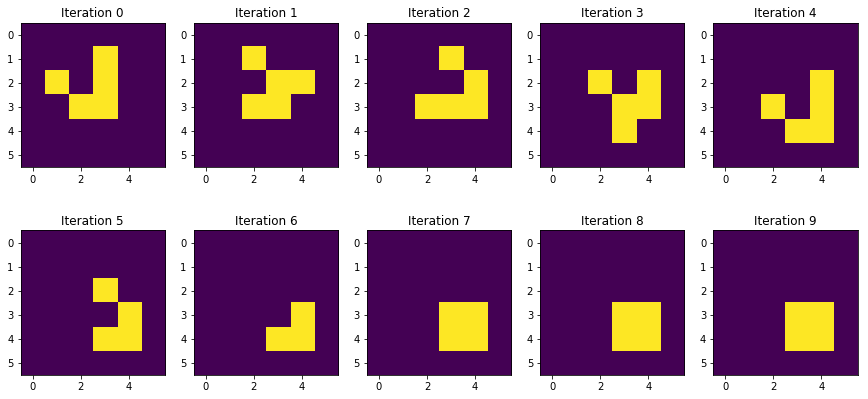

In [84]:
# NOT USING NUMBA.JIT() TO COMPARE RUNNING TIMES. 
start = time.time()
plotJeuDeLaVie(10,Z_np,iteration_jeu)
end = time.time()
print("Elapsed (not using numba.jit()) = %s" % (end-start))

On ne voit pas que c'est plus efficace à utiliser jit dans ce cas là.

### Question 8

In [95]:
from ipywidgets import interact

interact(plotJeuDeLaVie, nbIterations=(2,9,1),Z=Z_np,iter_func = iteration_jeu_np)

TraitError: Invalid selection: value not found

In [14]:
n = 100
Z_huge = np.zeros((n,n))
Z_huge[10:16,10:16] = Z_np

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

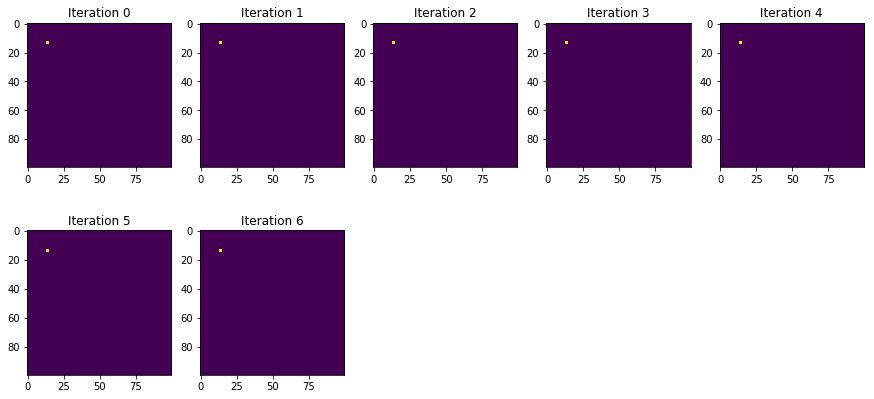

In [88]:
plotJeuDeLaVie(7,Z_huge,iteration_jeu_np)

In [ ]:
# DO NOT REPORT THIS... COMPILATION TIME IS INCLUDED IN THE EXECUTION TIME!
start = time.time()
calcul_nb_voisins_np(Z_huge)
end = time.time()
print("Elapsed (including compilation) = %s" % (end - start))

# NOW THE FUNCTION IS COMPILED, RE-TIME IT EXECUTING FROM CACHE
start = time.time()
calcul_nb_voisins_np(Z_huge)
end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))

# 
start = time.time()
calcul_np_voisins(Z_huge)
end = time.time()
print("Elapsed (not using numba.jit()) = %s" % (end-start))